In [11]:
# Importing the libraries
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as  sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [13]:
# Importing the data
data= web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2019-12-17')
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.799057
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.969292
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.879601


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB


In [16]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

No null values found

# visualization

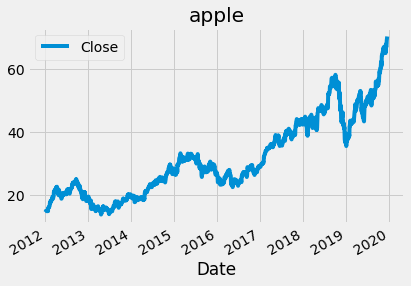

In [17]:
data[['Close']].plot()
plt.title("apple")
plt.show()


Text(0.5, 1.0, 'apple Cumulative Returns')

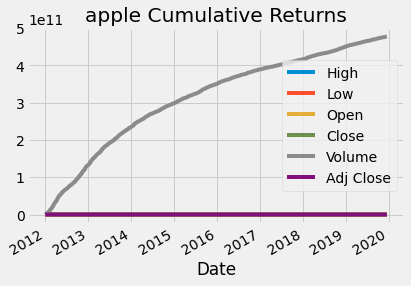

In [18]:
# Comulative Return
dr = data.cumsum()
dr.plot()
plt.title('apple Cumulative Returns')

<AxesSubplot:xlabel='High', ylabel='Volume'>

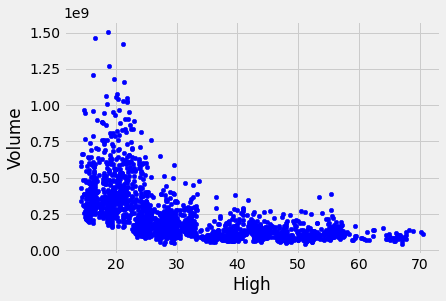

In [19]:
df.plot.scatter(x='High',y='Volume',c='blue')

Text(0, 0.5, 'close price in dollars')

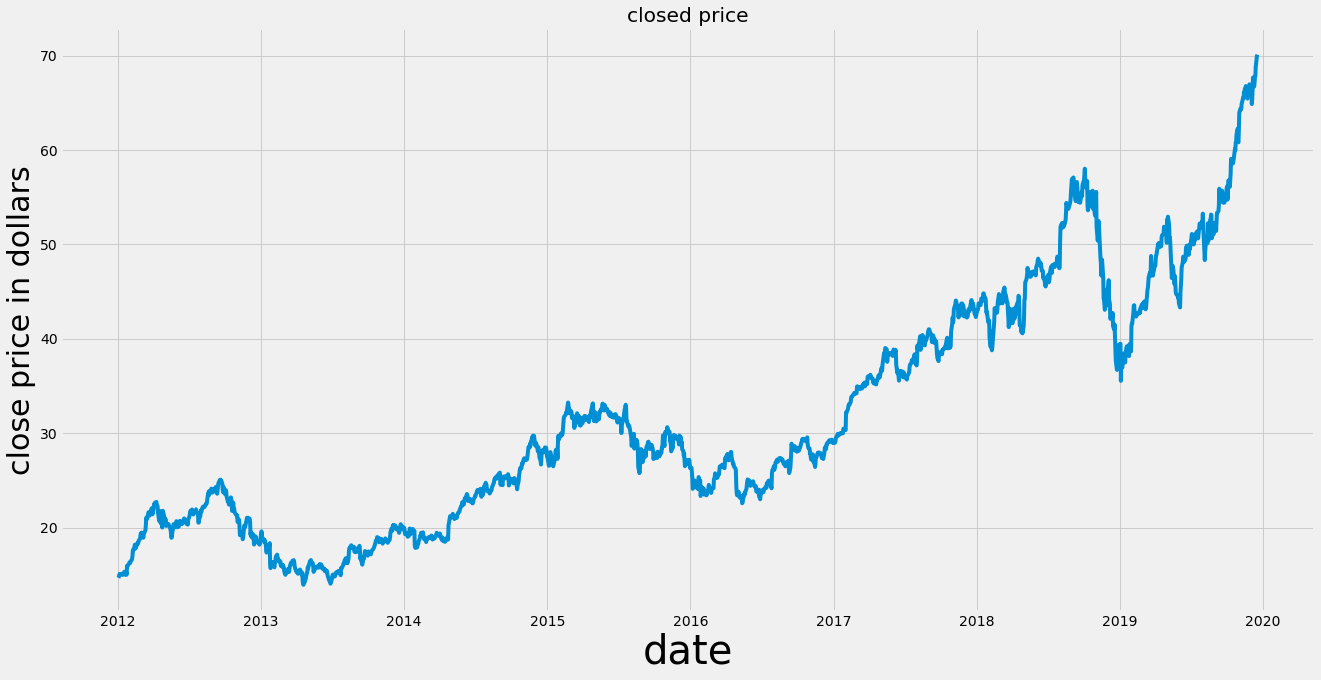

In [21]:
plt.figure(figsize=(20,10))
plt.title('closed price')
plt.plot(data['Close'])
plt.xlabel('date',fontsize=40)
plt.ylabel('close price in dollars',fontsize=30)

Text(0, 0.5, 'Open Price in Dollars')

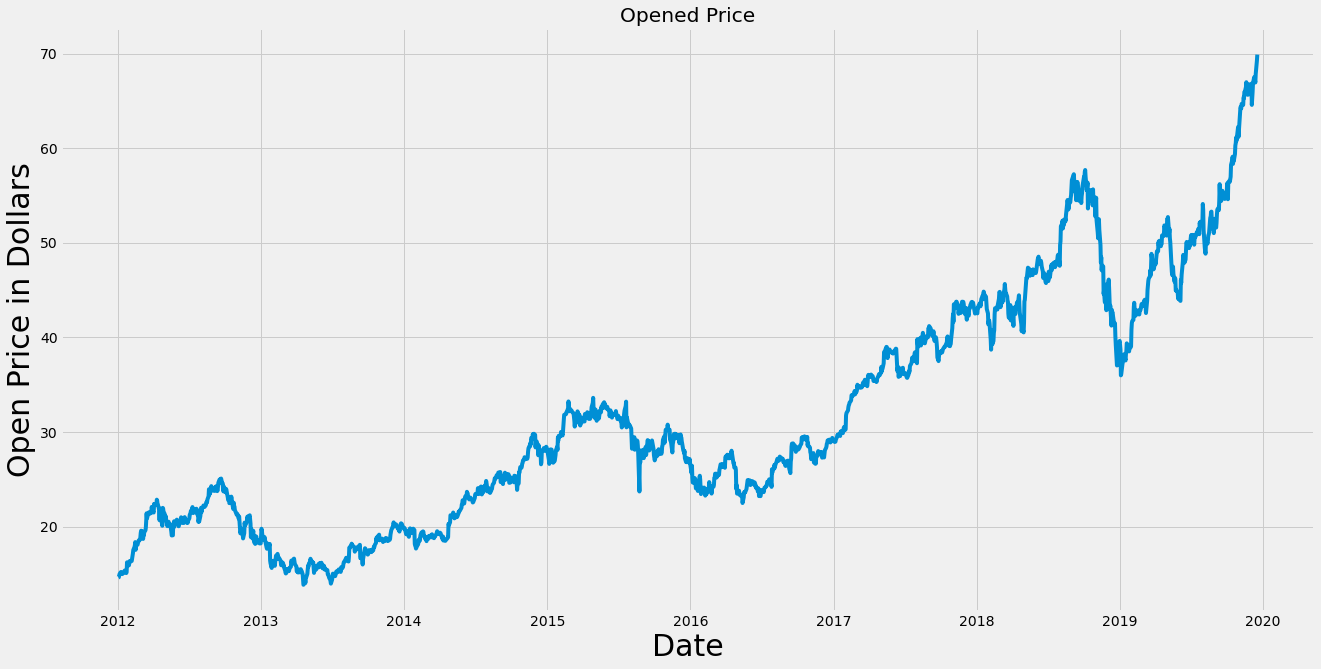

In [22]:
plt.figure(figsize=(20, 10))
plt.title('Opened Price')
plt.plot(data['Open'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Open Price in Dollars', fontsize=30)

In [23]:
data = df.filter(['Close'])
data1 = data.values
print(data1)

[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


# splitting data into train and test

In [25]:
training_data_size = math.ceil(len(data1)*.8)
training_data_size

1603

In [27]:
# scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data1)
print(scaled_data.shape)
print(scaled_data)

(2003, 1)
[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [28]:
train_data = scaled_data[0:training_data_size, :]
print(len(train_data))
x_train, y_train = [], []
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i,0])
    if i<=100:
       print(x_train)
       print(y_train)
       print()

1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464214, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0

In [29]:
test_data = scaled_data[training_data_size:, :]
print(len(test_data))
x_test, y_test = [], []
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    y_test.append(train_data[i,0])
    if i<=100:
       print(x_test)
       print(y_test)

400
[array([0.5840976 , 0.58107023, 0.58694685, 0.58485443, 0.59019677,
       0.58926183, 0.59117621, 0.58814884, 0.58636808, 0.58356332,
       0.59856648, 0.60564509, 0.61223397, 0.61521678, 0.61290181,
       0.60506631, 0.60297388, 0.60764846, 0.60061435, 0.60105957,
       0.59233369, 0.59188854, 0.57831003, 0.58191611, 0.5772861 ,
       0.574882  , 0.5626391 , 0.57270052, 0.57149854, 0.57746415,
       0.57572789, 0.58494342, 0.57043004, 0.57701893, 0.58846051,
       0.60008013, 0.5990562 , 0.58805984, 0.6020835 , 0.6034191 ,
       0.60154929, 0.60395332, 0.59927874, 0.6058677 , 0.60390882,
       0.60466565, 0.61085388, 0.61895648, 0.61624078, 0.60186089,
       0.59709732, 0.59878902, 0.64869556, 0.67491762, 0.67758883,
       0.68239696, 0.67367108, 0.67429435, 0.68155107, 0.6755409 ,
       0.68150651, 0.68542426, 0.68760575, 0.7013178 , 0.72028314,
       0.710845  , 0.70897512, 0.70901968, 0.71097855, 0.71396136,
       0.72188585, 0.72972128, 0.74432371, 0.75345025, 0.

In [30]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)


(1503, 100, 1) (1503,)


In [31]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


# Model Building 

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense (Dense)                (None, 1)                 26        
Total params: 38,226
Trainable params: 38,226
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [35]:
# fitting the model
lstm = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size= 64, epochs = 100, verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 250ms/step - loss: 0.0121 - val_loss: 0.3113
Epoch 2/100
24/24 [==============================] - 3s 138ms/step - loss: 9.6498e-04 - val_loss: 0.3188
Epoch 3/100
24/24 [==============================] - 3s 137ms/step - loss: 5.3170e-04 - val_loss: 0.3310
Epoch 4/100
24/24 [==============================] - 3s 137ms/step - loss: 4.9189e-04 - val_loss: 0.3224
Epoch 5/100
24/24 [==============================] - 4s 147ms/step - loss: 4.8193e-04 - val_loss: 0.3260
Epoch 6/100
24/24 [==============================] - 3s 128ms/step - loss: 4.6447e-04 - val_loss: 0.3440
Epoch 7/100
24/24 [==============================] - 3s 131ms/step - loss: 4.5541e-04 - val_loss: 0.3300
Epoch 8/100
24/24 [==============================] - 3s 134ms/step - loss: 4.4048e-04 - val_loss: 0.3372
Epoch 9/100
24/24 [==============================] - 3s 134ms/step - loss: 4.2439e-04 - val_loss: 0.3460
Epoch 10/100
24/24 [==============================] - 4s 1

# Model prediction

In [36]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [37]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
print(train_pred.shape, test_pred.shape)

(1503, 1) (300, 1)


In [38]:
math.sqrt(mean_squared_error(y_train, train_pred))

28.239202543533082

In [39]:
math.sqrt(mean_squared_error(y_test, test_pred))

50.79150266291032

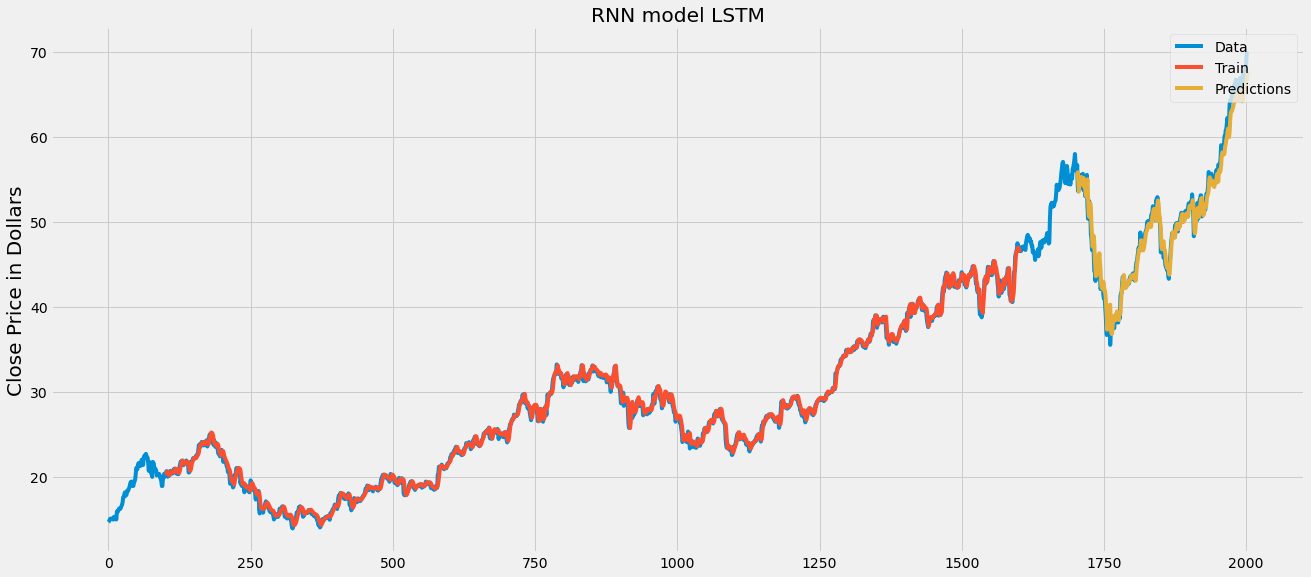

In [42]:
train_pred_plot = np.empty_like(data1)
train_pred_plot[:, :] = np.nan
train_pred_plot[100:len(train_pred)+100, :1] = train_pred
test_pred_plot = np.empty_like(data1)
test_pred_plot[:] = np.nan
test_pred_plot[len(train_pred)+(100*2):len(data1), :] = test_pred
plt.figure(figsize=(20,9))
plt.title('RNN model LSTM')
plt.ylabel('Close Price in Dollars', fontsize=20)
plt.plot(data1)
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.legend(['Data', 'Train', 'Predictions'], loc='upper right')
plt.show()
